In [3]:
import numpy as np
import pandas as pd

In [4]:
path = '逻辑回归数据.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.insert(0, 'Ones', 1)

In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
theta = np.zeros(3)

代码含义：👇1 / (1 + np.exp(-z))

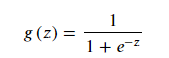

In [33]:
"我们的假设函数sigmoid"
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

代码含义：👇 np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

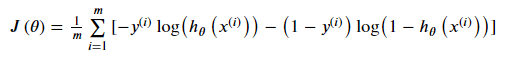

In [8]:
"损失函数"
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

代码含义：👇 (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y) ：

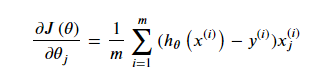

注意，在逻辑回归的梯度下降虽然长得和线性回归基本一样，但这里的hθ是sigmoid，不是线性方程

In [9]:
"梯度下降"
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [10]:
"简要介绍一下scipy，和pandas一样是一个以numpy为基础的数据科学包。pandas更多的用在金融商业场景；scipy则更偏向于科学与工程"
"求最优解"
import scipy.optimize as opt
result = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
result
# 参数fun：损失函数
# 参数x0：初始化参数θ
# 参数args：传入fun中其余的参数
# 参数method：计算梯度的方法，这里采用'Nweton-CG（牛顿共轭梯度算法）'；还有很多不同的方法：L-BFGS-B、BFGS、Nelder-Mead。。。。
# 参数jac：计算梯度的函数

     fun: 0.20349770249211604
     jac: array([2.67323741e-05, 1.76854178e-03, 1.64489142e-03])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 204
  status: 0
 success: True
       x: array([-25.16376776,   0.20625197,   0.20149048])

In [11]:
"""optimize返回的结果类似于字典，我们可以通过 . 去访问其中的内容
    其中的x是我们需要的：最优化的θ
"""
cost(result.x, X, y) #将最优化的θ代入cost函数计算一下损失值

0.20349770249211604

In [12]:
"预测分类"
def predict(x, theta):
    prob = sigmoid(x @ theta) #将我们的样本x 与 最优θ放入sigmoid中进行预测
    return (prob >= 0.5).astype(int) #这里很巧妙，利用prob>=0.5返回一个布尔数组，再利用astype(int)，为true的元素会向上取整变为1

In [13]:
#查看分类后的各项结果。关于此包的更多内容：https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
from sklearn.metrics import classification_report
final_theta = result.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# scikit-learn用法

In [14]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression() #将模型设置为逻辑回归模型
model.fit(X,y) #拟合最优的模型

LogisticRegression()

In [15]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

